<a href="https://colab.research.google.com/github/teamsimcoemmai/mmai894/blob/894-pj/Final%20Project/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruction to Run the Code


1.   Add the Share folder short cut to your own drive
2.   Mount the drive
3. Run the code



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import matplotlib.pyplot as plt
import os
import cv2 as cv
from tqdm import tqdm

In [9]:
from tensorflow import keras
from keras import Input
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.regularizers import l2
from keras.preprocessing import image,image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
# from keras.preprocessing import image

from tensorflow.keras.applications import Xception

In [10]:
# Image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                  #  shear_range=0.2,
                                   rotation_range=5,
                                   zoom_range=1.1,    
                                   brightness_range=[0,0.2],
                                   )

# Get train, val and tets data
train_data = train_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/train_set',
                                                target_size=(224,224),
                                                batch_size=32,
                                                seed=42,
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/val_set',
                                            target_size=(224,224),
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/Simcoe/894/Car dataset/new/test_set',
                                            target_size=(224,224),
                                            batch_size=32,
                                            seed=42,
                                            class_mode='categorical',
                                            shuffle=False)

Found 11330 images belonging to 196 classes.
Found 2428 images belonging to 196 classes.
Found 2427 images belonging to 196 classes.


## Build CNN Model

In [11]:
model = Sequential()
#1st Convolution and Pooling Layer
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#2nd Convolution and Pooling Layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
#3rd Convolution and Pooling Layer
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#Flatten
model.add(Flatten())

#Input and Output Layer
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=196,activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

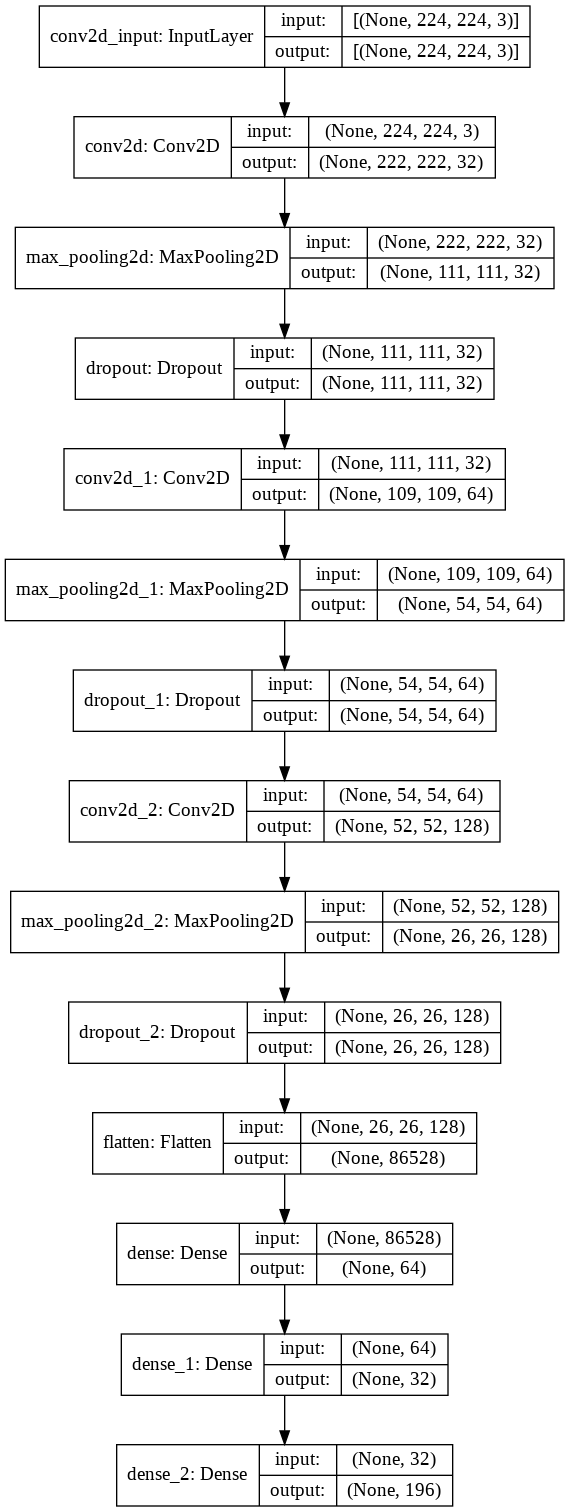

In [12]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [13]:
history = model.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=50,
                            validation_data=val_data,
                            validation_steps=50)
model.save('/content/gdrive/MyDrive/894 proj/CNN_3_Layers.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 2513s 25s/step - loss: 5.2794 - accuracy: 0.0044 - val_loss: 5.2783 - val_accuracy: 0.0069
Epoch 2/50
100/100 [==============================] - 1489s 15s/step - loss: 5.2769 - accuracy: 0.0026 - val_loss: 5.2786 - val_accuracy: 0.0081
Epoch 3/50
100/100 [==============================] - 959s 10s/step - loss: 5.2774 - accuracy: 0.0075 - val_loss: 5.2785 - val_accuracy: 0.0100
Epoch 4/50
100/100 [==============================] - 672s 7s/step - loss: 5.2764 - accuracy: 0.0083 - val_loss: 5.2779 - val_accuracy: 0.0088
Epoch 5/50
100/100 [==============================] - 487s 5s/step - loss: 5.2747 - accuracy: 0.0075 - val_loss: 5.2789 - val_accuracy: 0.0069
Epoch 6/50
100/100 [==============================] - 387s 4s/step - loss: 5.2758 - accuracy: 0.0084 - val_loss: 5.2792 - val_accuracy: 0.0106
Epoch 7/50
100/100 [==============================] - 267s 3s/step - loss: 5.2746 - accuracy: 0.0063 - val_loss: 5.2797 - val_accuracy: 0

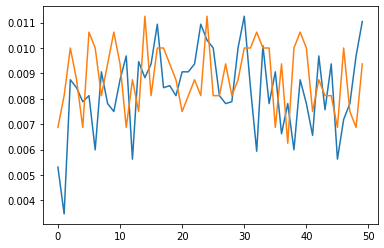

In [17]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')

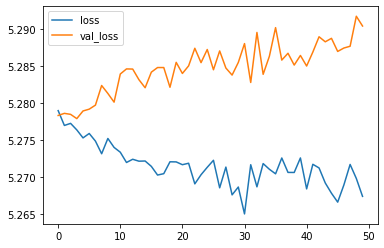

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

## Tune CNN Model

In [20]:
model1 = Sequential()
#1st Convolution and Pooling Layer
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

#2nd Convolution and Pooling Layer
model1.add(Conv2D(64,kernel_size=(3,3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

#3rd Convolution and Pooling Layer
model1.add(Conv2D(128,kernel_size=(3,3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.5))

#Flatten
model1.add(Flatten())

#Adding Input and Output Layer
model1.add(Dense(units=256,activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model1.add(Dense(units=196,activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)

model1.compile(optimizer=opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
earlystop = EarlyStopping(monitor = 'val_loss',
                         min_delta = 1.0e-5,
                         patience = 15,
                         verbose =2,
                         restore_best_weights = True)

checkpoint = ModelCheckpoint('/content/gdrive/MyDrive/894 proj/models/',
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose = 2
                            )

reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                         factor=0.1,
                         patience=10,
                         verbose=2,
                         mode='auto',
                         min_delta=0.0001,
                         cooldown=0,
                         min_lr=0)

callbacks = [earlystop,checkpoint,reduce_lr]

In [23]:
history1 = model1.fit_generator(train_data,
                            steps_per_epoch=100,
                            epochs=100,
                            callbacks = callbacks,
                            validation_data=val_data,
                            validation_steps=50)
model1.save('/content/gdrive/MyDrive/894 proj/CNN_5_Layers_lr.hdf5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 52s 524ms/step - loss: 6.6693 - accuracy: 0.0081 - val_loss: 8.3144 - val_accuracy: 0.0075

Epoch 00001: val_loss improved from inf to 8.31438, saving model to /content/gdrive/MyDrive/894 proj/models/
Epoch 2/100
100/100 [==============================] - 52s 520ms/step - loss: 6.5563 - accuracy: 0.0066 - val_loss: 8.2125 - val_accuracy: 0.0037

Epoch 00002: val_loss improved from 8.31438 to 8.21252, saving model to /content/gdrive/MyDrive/894 proj/models/
Epoch 3/100
100/100 [==============================] - 54s 542ms/step - loss: 6.4856 - accuracy: 0.0091 - val_loss: 6.5163 - val_accuracy: 0.0106

Epoch 00003: val_loss improved from 8.21252 to 6.51628, saving model to /content/gdrive/MyDrive/894 proj/models/
Epoch 4/100
100/100 [==============================] - 54s 536ms/step - loss: 6.4192 - accuracy: 0.0095 - val_loss: 6.3776 - val_accuracy: 0.0063

Epoch 00004: val_loss improved from 6.51628 to 6.37761, saving model to /cont

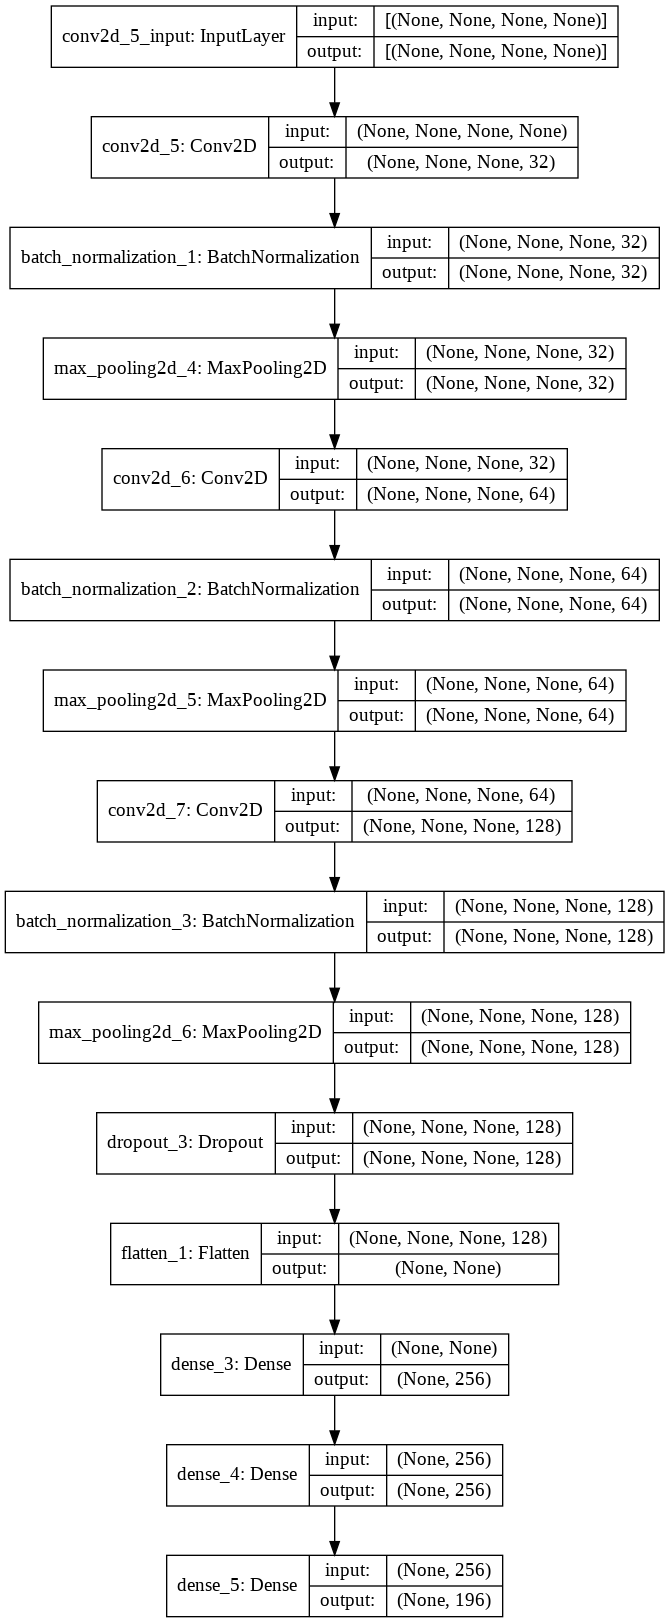

In [24]:
tf.keras.utils.plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)

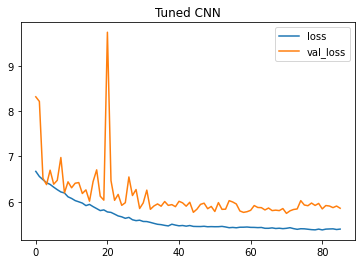

In [25]:
plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.title('Tuned CNN')
plt.legend()

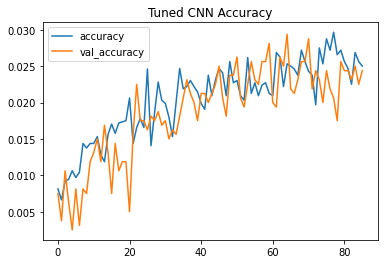

In [34]:
plt.plot(history1.history['accuracy'],label='accuracy')
plt.plot(history1.history['val_accuracy'],label='val_accuracy')
plt.title('Tuned CNN Accuracy')
plt.legend()

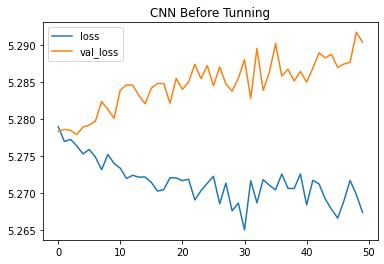

In [27]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("CNN Before Tunning")
plt.legend()

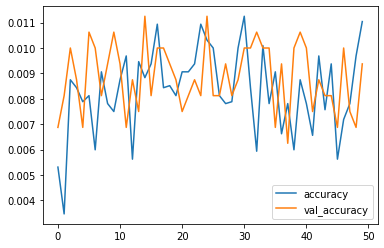

In [28]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

## Model Prediction and Evaluation

In [29]:
## Prediction results before tuning
# model = load_model('/content/gdrive/MyDrive/894 proj/CNN_3_Layers.hdf5')
model_pred = model.predict(test_data)
pred_labels = np.argmax(model_pred, axis=-1)
print(pred_labels.shape)  

## Prediction results after tuning
# model1 = load_model('/content/gdrive/MyDrive/894 proj/CNN_5_Layers.hdf5')
model_pred1 = model1.predict(test_data)
pred_labels1 = np.argmax(model_pred1, axis=-1)  
print(pred_labels1.shape)

(2427,)
(2427,)


In [30]:
# load test csv
df_test_new = pd.read_csv('/content/gdrive/MyDrive/Simcoe/894/Car dataset/df_test_new.csv')
df_test_new

,Unnamed: 0,img_path,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class,test,car_class_name,test_new,bbox_h,bbox_w,img_name
0,3,car_ims/000004.jpg,33,50,197,150,1,0,AM General Hummer SUV 2000,1,100,164,000004.jpg
1,8,car_ims/000009.jpg,15,111,271,272,1,0,AM General Hummer SUV 2000,1,161,256,000009.jpg
2,20,car_ims/000021.jpg,50,127,587,396,1,0,AM General Hummer SUV 2000,1,269,537,000021.jpg
3,22,car_ims/000023.jpg,52,25,751,507,1,0,AM General Hummer SUV 2000,1,482,699,000023.jpg
4,25,car_ims/000026.jpg,21,18,492,316,1,0,AM General Hummer SUV 2000,1,298,471,000026.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422,16144,car_ims/016145.jpg,104,165,416,381,196,0,smart fortwo Convertible 2012,1,216,312,016145.jpg
2423,16148,car_ims/016149.jpg,14,22,511,388,196,1,smart fortwo Convertible 2012,1,366,497,016149.jpg
2424,16150,car_ims/016151.jpg,26,64,477,381,196,1,smart fortwo Convertible 2012,1,317,451,016151.jpg
2425,16156,car_ims/016157.jpg,23,2,640,495,196,1,smart fortwo Convertible 2012,1,493,617,016157.jpg


In [31]:
# Define column names for test dataframe
feature_list = ['actual_class','predicted_class']

In [32]:
# Calculate test accuracy for CNN before tuning
valid = pd.DataFrame(0, index=df_test_new.index, columns=feature_list)
valid['actual_class'] = df_test_new['class']
valid['predicted_class'] = pred_labels +1

valid['diff'] = np.where(valid['actual_class'] == valid['predicted_class'],1,0)
accuracy = valid['diff'].sum()/valid.shape[0]*100
print('Test accuracy for untuned CNN model is: {:.2f}%'.format(accuracy))

Test accuracy for untuned CNN model is: 0.66%


In [33]:
# Calculate test accuracy for tuned CNN
valid1 = pd.DataFrame(0, index=df_test_new.index, columns=feature_list)
valid1['actual_class'] = df_test_new['class']
valid1['predicted_class'] = pred_labels1

valid1['diff'] = np.where(valid1['actual_class'] == valid1['predicted_class'],1,0)
accuracy1 = valid1['diff'].sum()/valid1.shape[0]*100
print('Test accuracy for tuned CNN model is: {:.2f}%'.format(accuracy1))

Test accuracy for tuned CNN model is: 1.73%
